In [115]:
# Author: Roshan Ram
# andrewID: rram

######################################################################################


# Author: Roshan Ram
# AndrewID: rram

import yfinance as yfinance

import module_manager
module_manager.review()

import yfinance as yf # to pull stock data with yf.download(name, yyyy-mm-dd of opening, yyyy-mm-dd of opening)

import numpy as np # used for everything lol
import pandas as pd # data mainpulation
import matplotlib.pyplot as plt # graphing/plotting
from keras import *


#####
import numpy as np
import os
import sys
import time
import pandas as pd 
from tqdm._tqdm_notebook import tqdm_notebook
import pickle
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import logging

####################################################################################################




# from ipynb.fs.full.v1mainstockfile_notebookversion import *
%run v1mainstockfile_notebookversion.ipynb


In [116]:
data, stocks = getData()

Enter your desired stock. Only alphanumeric characters please.AAPL
Enter your desired opening date. (yyyy-mm-dd)2016-08-01
Enter your desired closing date. (yyyy-mm-dd)2019-01-01
[*********************100%***********************]  1 of 1 completed


In [117]:
data['10 day MA'] = data['Close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
data['20 day MA'] = data['Close'].rolling(20).mean().shift()

In [118]:
data = data['Close']
array = data.values.reshape(data.shape[0],1)
array[:5]

array([[106.05000305],
       [104.48000336],
       [105.79000092],
       [105.87000275],
       [107.48000336]])

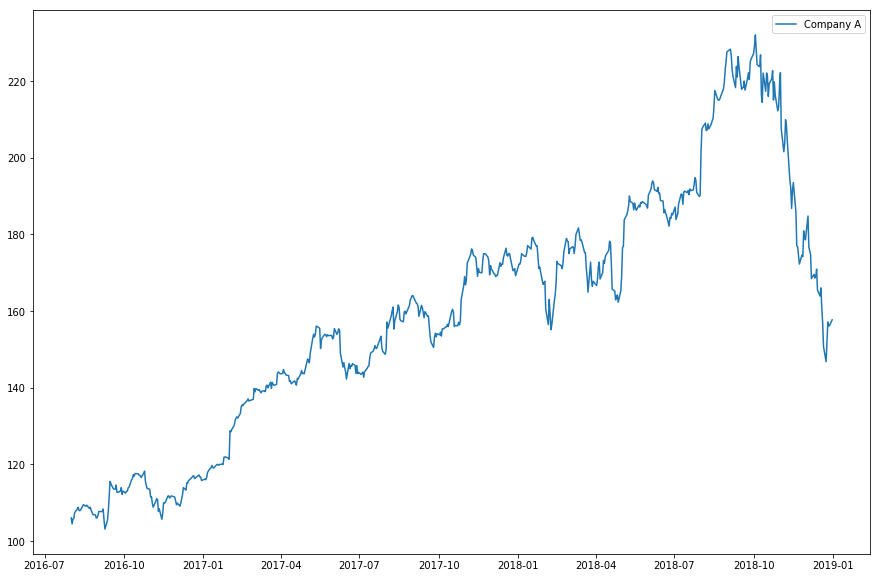

In [119]:
plt.figure(figsize = (15,10))
plt.plot(data, label='Company A')
plt.legend(loc='best')
plt.show()

In [130]:
scl = MinMaxScaler()
array = scl.fit_transform(array)
# array[:5]
array.shape

(609, 1)

In [134]:
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [135]:
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [144]:
testX,testY = processData(array_test,look_back,forward_days,forward_days)
testY = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
trainX, validateX, trainY, validateY = train_test_split(X, y, test_size=0.20, random_state=42)

In [137]:
# array = data[0].values

# scl = MinMaxScaler()
# array = scl.fit_transform(array)
# array[:5]

In [138]:
# # df_train, df_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)
# xTrain, xTest, yTrain, yTest = train_test_split(data, test_size = 0.2, random_state = 0)

In [139]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(288, 40, 8)
(72, 40, 8)
(20, 40, 1)
(288, 80)
(72, 80)
(20, 10)


In [126]:
look_back = 40
forward_days = 10
num_periods = 20

In [140]:
# NUM_NEURONS_FirstLayer = 128
# NUM_NEURONS_SecondLayer = 64
# EPOCHS = 220
# #Build the model
# model = Sequential()
# model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
# model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
# model.add(Dense(forward_days))
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(trainX,trainY,epochs=EPOCHS,validation_data=(validateX, validateY),shuffle=True,batch_size=2, verbose=2)

NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(trainX,trainY,epochs=EPOCHS,validation_data=(validateX,validateY),shuffle=True,batch_size=2, verbose=2)

Train on 288 samples, validate on 72 samples
Epoch 1/50
 - 5s - loss: 0.0090 - val_loss: 0.0019
Epoch 2/50
 - 5s - loss: 0.0026 - val_loss: 0.0021
Epoch 3/50
 - 5s - loss: 0.0024 - val_loss: 0.0022
Epoch 4/50
 - 5s - loss: 0.0024 - val_loss: 0.0028
Epoch 5/50
 - 4s - loss: 0.0024 - val_loss: 0.0017
Epoch 6/50
 - 5s - loss: 0.0022 - val_loss: 0.0022
Epoch 7/50
 - 4s - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
 - 4s - loss: 0.0020 - val_loss: 0.0020
Epoch 9/50
 - 4s - loss: 0.0021 - val_loss: 0.0015
Epoch 10/50
 - 4s - loss: 0.0019 - val_loss: 0.0020
Epoch 11/50
 - 5s - loss: 0.0019 - val_loss: 0.0017
Epoch 12/50
 - 5s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/50
 - 5s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
 - 5s - loss: 0.0019 - val_loss: 0.0014
Epoch 15/50
 - 5s - loss: 0.0018 - val_loss: 0.0018
Epoch 16/50
 - 5s - loss: 0.0017 - val_loss: 0.0015
Epoch 17/50
 - 5s - loss: 0.0016 - val_loss: 0.0015
Epoch 18/50
 - 5s - loss: 0.0019 - val_loss: 0.0014
Epoch 19/50
 - 5s - loss: 0.

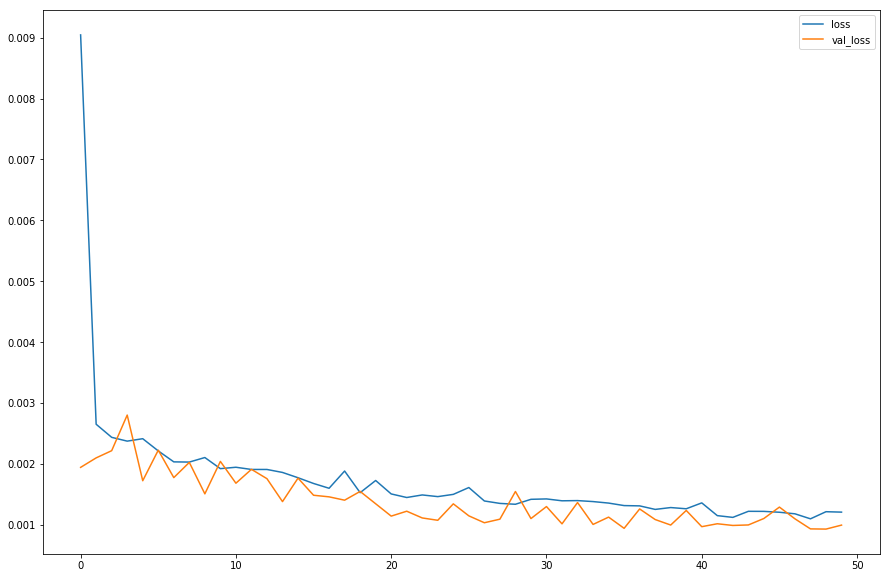

In [141]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [181]:
file_name = '12_3_LSTM.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `12_3_LSTM.h5` to disk


In [182]:
testX

array([[[0.59042959],
        [0.58422525],
        [0.5729021 ],
        [0.57321227],
        [0.5513417 ],
        [0.52722195],
        [0.53032412],
        [0.50279203],
        [0.495114  ],
        [0.49868148],
        [0.50139597],
        [0.44493562],
        [0.41383592],
        [0.46455713],
        [0.43749024],
        [0.4034434 ],
        [0.41321547],
        [0.46207542],
        [0.47471688],
        [0.49821617],
        [0.54180241],
        [0.53745921],
        [0.53296109],
        [0.52691178],
        [0.53800215],
        [0.56126878],
        [0.58818053],
        [0.5836823 ],
        [0.58158827],
        [0.55739101],
        [0.56677527],
        [0.57150616],
        [0.57034276],
        [0.55762367],
        [0.57243679],
        [0.59601359],
        [0.60950828],
        [0.59593608],
        [0.5840701 ],
        [0.5856987 ]],

       [[0.50139597],
        [0.44493562],
        [0.41383592],
        [0.46455713],
        [0.43749024],
        

In [145]:
Xt = model.predict(testX)


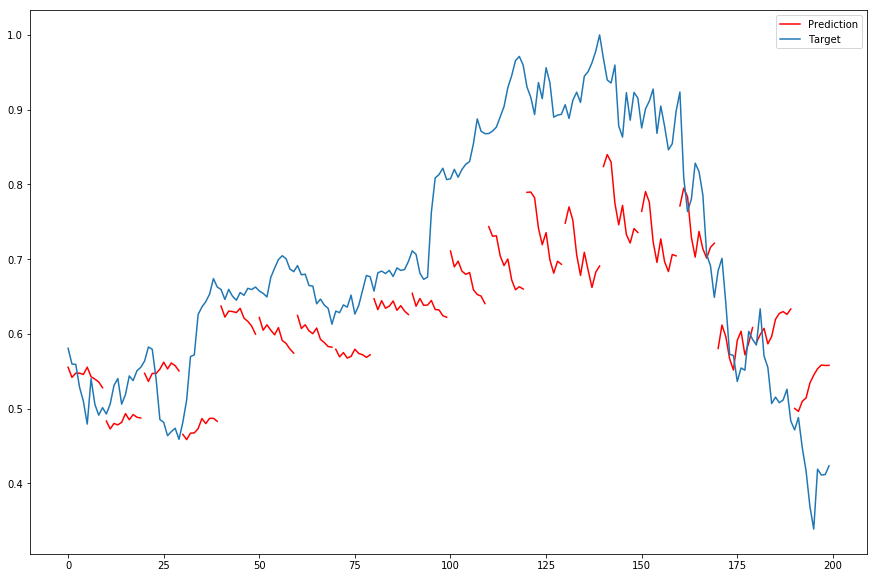

In [146]:

plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

# Measuring reactions to real data

In [168]:

division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

In [172]:
Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

In [173]:
Xtest

array([[[0.59042959],
        [0.58422525],
        [0.5729021 ],
        [0.57321227],
        [0.5513417 ],
        [0.52722195],
        [0.53032412],
        [0.50279203],
        [0.495114  ],
        [0.49868148],
        [0.50139597],
        [0.44493562],
        [0.41383592],
        [0.46455713],
        [0.43749024],
        [0.4034434 ],
        [0.41321547],
        [0.46207542],
        [0.47471688],
        [0.49821617],
        [0.54180241],
        [0.53745921],
        [0.53296109],
        [0.52691178],
        [0.53800215],
        [0.56126878],
        [0.58818053],
        [0.5836823 ],
        [0.58158827],
        [0.55739101],
        [0.56677527],
        [0.57150616],
        [0.57034276],
        [0.55762367],
        [0.57243679],
        [0.59601359],
        [0.60950828],
        [0.59593608],
        [0.5840701 ],
        [0.5856987 ]],

       [[0.50139597],
        [0.44493562],
        [0.41383592],
        [0.46455713],
        [0.43749024],
        

In [174]:

Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [175]:
y = np.concatenate((ytrain, ytest), axis=0)

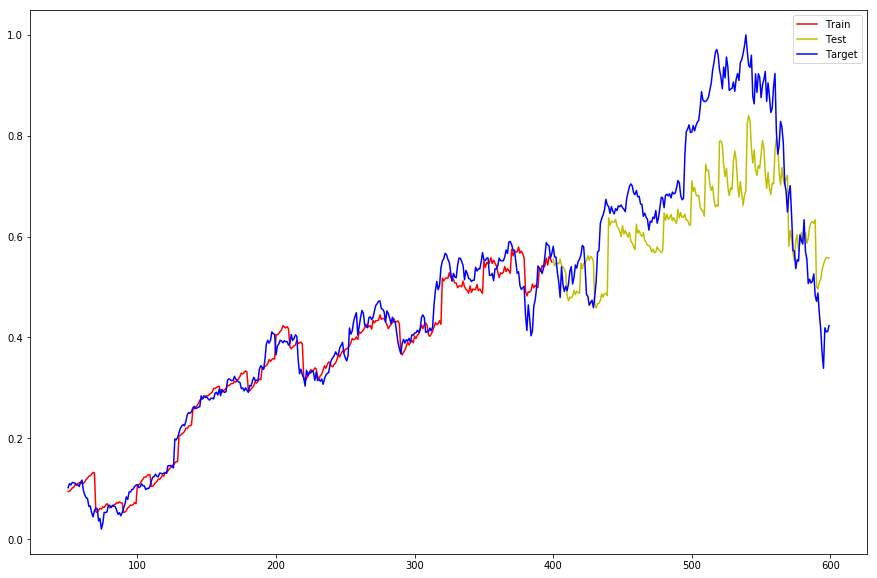

In [177]:
plt.figure(figsize = (15,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')

# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')

#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data used
# plt.plot(scl.inverse_transform(array), color='b')

plt.legend(loc='best')
plt.show()

In [180]:
model.predict(Xtrain)   

ValueError: Error when checking input: expected lstm_23_input to have 3 dimensions, but got array with shape (350, 1)